In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the CSV, skipping the metadata/header rows
df = pd.read_csv('Kanishk_K562_TNFA_Validation_Optical_Results.csv', skiprows=19)

# Select relevant columns and drop rows with missing values
df = df[['Sample', 'Biological Set Name', 'Cq']].dropna()

# Extract numeric time for sorting (e.g., "10 min" -> 10)
def extract_time(s):
    match = re.match(r'(\d+)\s*min', str(s))
    return int(match.group(1)) if match else -1

# Create a new column for sorting
df['time_numeric'] = df['Biological Set Name'].apply(extract_time)

# Get unique Biological Set Names and sort them by extracted time
sorted_time_names = df.drop_duplicates('Biological Set Name').sort_values('time_numeric')['Biological Set Name']

# Pivot the table
pivot = df.pivot(index='Sample', columns='Biological Set Name', values='Cq')

# Reindex columns to ensure correct order
pivot = pivot.reindex(columns=sorted_time_names)

pivot_table=pivot

pivot_table

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,20.167819,20.057232,20.032432,20.162431,20.184199,20.323662,20.301582,20.242956,20.251312,20.054655,20.240633,20.300083
GAPDH,21.432254,21.114981,21.073946,21.137320,20.904244,21.168053,21.009488,21.048110,20.973592,20.769913,20.765195,20.187977
HPRT1,29.886828,29.958761,30.046877,30.193573,29.970664,30.576978,30.232387,31.233056,30.099213,30.102881,30.227369,30.441267
ICAM1,26.574846,26.325522,25.723978,23.702137,22.447005,22.015139,21.482922,21.353166,20.881415,20.612188,20.579137,20.791574
IER3,26.882741,26.473618,24.288434,23.268375,22.756264,22.959706,23.012005,22.984936,22.782780,22.935748,22.817715,23.383582
IL8,30.369014,30.748940,29.307146,28.438746,27.953410,28.294158,28.263602,28.155412,27.720445,27.881261,27.712730,27.757117
NFKBIA,26.347702,25.626266,23.297582,22.464121,22.000991,22.033389,21.984129,21.982766,21.805209,21.947809,22.016316,22.263624
TNFRSF9,36.513770,35.399690,34.987913,31.495087,30.034275,30.142218,29.225559,28.909810,28.081962,28.056233,28.109982,28.587318


In [2]:
#ACTB has more stable expression. Selecting it for Normalization. Also had Pipetting error for last GAPDH Sample at 110min. Ran out of RT-PCR Mix
#Getting Delta Ct
#Dropping HPRT1 and GAPDH from Analysis
pivot_table = pivot_table.drop(['HPRT1', 'GAPDH'], axis=0)
pivot_table

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,20.167819,20.057232,20.032432,20.162431,20.184199,20.323662,20.301582,20.242956,20.251312,20.054655,20.240633,20.300083
ICAM1,26.574846,26.325522,25.723978,23.702137,22.447005,22.015139,21.482922,21.353166,20.881415,20.612188,20.579137,20.791574
IER3,26.882741,26.473618,24.288434,23.268375,22.756264,22.959706,23.012005,22.984936,22.782780,22.935748,22.817715,23.383582
IL8,30.369014,30.748940,29.307146,28.438746,27.953410,28.294158,28.263602,28.155412,27.720445,27.881261,27.712730,27.757117
NFKBIA,26.347702,25.626266,23.297582,22.464121,22.000991,22.033389,21.984129,21.982766,21.805209,21.947809,22.016316,22.263624
TNFRSF9,36.513770,35.399690,34.987913,31.495087,30.034275,30.142218,29.225559,28.909810,28.081962,28.056233,28.109982,28.587318


In [3]:
#Getting Delta Ct
delta_ct = pivot_table.sub(pivot_table.loc['ACTB'], axis=1)
delta_ct

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ICAM1,6.407027,6.268290,5.691546,3.539706,2.262807,1.691477,1.181340,1.110209,0.630103,0.557533,0.338504,0.491491
IER3,6.714922,6.416386,4.256002,3.105945,2.572066,2.636043,2.710423,2.741980,2.531469,2.881093,2.577082,3.083500
IL8,10.201196,10.691708,9.274714,8.276315,7.769211,7.970496,7.962020,7.912455,7.469134,7.826606,7.472096,7.457035
NFKBIA,6.179883,5.569034,3.265150,2.301690,1.816792,1.709727,1.682548,1.739810,1.553897,1.893154,1.775683,1.963542
TNFRSF9,16.345951,15.342458,14.955481,11.332656,9.850076,9.818556,8.923977,8.666854,7.830650,8.001578,7.869348,8.287236


In [4]:
#Setting first timepoint as control
control_delta_ct = delta_ct['0 min']
#Getting Delta Delta Ct
delta_delta_ct = delta_ct.sub(control_delta_ct, axis=0)
delta_delta_ct

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ICAM1,0.0,-0.138737,-0.715481,-2.867320,-4.144220,-4.715550,-5.225687,-5.296818,-5.776924,-5.849494,-6.068523,-5.915536
IER3,0.0,-0.298537,-2.458920,-3.608977,-4.142857,-4.078879,-4.004499,-3.972942,-4.183453,-3.833829,-4.137840,-3.631422
IL8,0.0,0.490512,-0.926481,-1.924881,-2.431984,-2.230699,-2.239175,-2.288740,-2.732062,-2.374590,-2.729099,-2.744161
NFKBIA,0.0,-0.610849,-2.914733,-3.878193,-4.363090,-4.470156,-4.497335,-4.440073,-4.625986,-4.286728,-4.404200,-4.216341
TNFRSF9,0.0,-1.003493,-1.390470,-5.013295,-6.495875,-6.527395,-7.421974,-7.679097,-8.515300,-8.344372,-8.476603,-8.058715


In [5]:
#Getting Fold Change
fold_change = 2 ** (-delta_delta_ct) 
fold_change #Values have too high a range will plot -delta_delta_ct only

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ICAM1,1.0,1.100941,1.642031,7.297086,17.682132,26.273752,37.418690,39.309816,54.831152,57.659786,67.113111,60.360620
IER3,1.0,1.229896,5.498051,12.201422,17.665425,16.899149,16.049978,15.702719,18.169583,14.259277,17.604103,12.392732
IL8,1.0,0.711772,1.900635,3.797054,5.396351,4.693615,4.721271,4.886292,6.644045,5.185883,6.630415,6.699999
NFKBIA,1.0,1.527158,7.540882,14.704572,20.578849,22.164143,22.585663,21.706772,24.692237,19.517933,21.173676,18.588537
TNFRSF9,1.0,2.004848,2.621641,32.296249,90.251244,92.244751,171.489161,204.945572,365.898699,325.017229,356.214517,266.633697


In [6]:
positive_ddct=-delta_delta_ct
positive_ddct #Changing sign

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
ICAM1,-0.0,0.138737,0.715481,2.867320,4.144220,4.715550,5.225687,5.296818,5.776924,5.849494,6.068523,5.915536
IER3,-0.0,0.298537,2.458920,3.608977,4.142857,4.078879,4.004499,3.972942,4.183453,3.833829,4.137840,3.631422
IL8,-0.0,-0.490512,0.926481,1.924881,2.431984,2.230699,2.239175,2.288740,2.732062,2.374590,2.729099,2.744161
NFKBIA,-0.0,0.610849,2.914733,3.878193,4.363090,4.470156,4.497335,4.440073,4.625986,4.286728,4.404200,4.216341
TNFRSF9,-0.0,1.003493,1.390470,5.013295,6.495875,6.527395,7.421974,7.679097,8.515300,8.344372,8.476603,8.058715


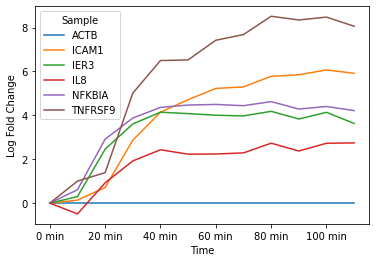

In [7]:
positive_ddct.T.plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation.svg", format='svg')

So a Time Delay before the activation of TNFRSF9 and ICAM1 is evident in the qPCR data as well.

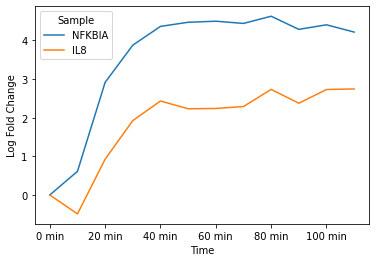

In [8]:
positive_ddct.T[["NFKBIA","IL8"]].plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation_NFKBIA_IL8.svg", format='svg')

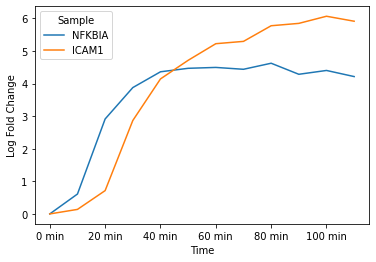

In [9]:
positive_ddct.T[["NFKBIA","ICAM1"]].plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation_NFKBIA_ICAM1.svg", format='svg')

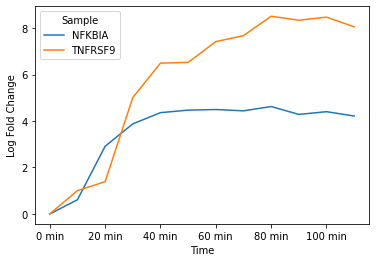

In [10]:
positive_ddct.T[["NFKBIA","TNFRSF9"]].plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation_NFKBIA_TNFRSF9.svg", format='svg')

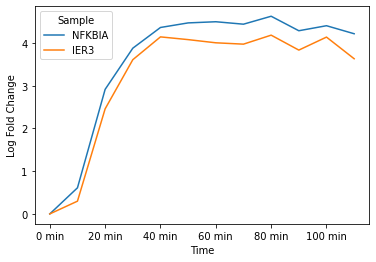

In [11]:
positive_ddct.T[["NFKBIA","IER3"]].plot(xlabel="Time", ylabel="Log Fold Change")
plt.savefig("qPCR_GenePlots_Log_Fold_Validation_NFKBIA_IER3.svg", format='svg')

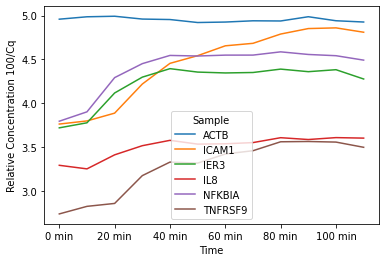

In [12]:
(100/pivot_table).T.plot(xlabel="Time",ylabel="Relative Concentration 100/Cq")
plt.savefig("qPCR_GenePlots_Relative_concentration_100DivCq.svg", format='svg')

In [13]:
scK562_genes=pd.read_csv("Selected_Genes_scK562.csv",index_col=0)

In [14]:
scK562_genes

,0,1,2,3,4,5,6,7,8,9,10,11
ACTB,2.351498,2.345519,2.265785,2.435185,2.346521,2.436598,2.363648,2.406789,2.411109,2.312562,2.433216,2.463869
ICAM1,0.112436,0.068673,0.056823,0.145843,0.175942,0.329538,0.409290,0.336870,0.650445,0.530640,0.574839,0.697737
IER3,0.106823,0.132932,0.417990,1.034437,0.716124,0.917963,0.698879,0.409435,0.595401,0.615399,0.630024,0.621174
IL8,0.084052,0.068673,0.136427,0.539073,0.575022,0.725738,0.574647,0.667157,0.658067,0.696120,0.734869,0.904187
NFKBIA,0.564091,0.573266,0.912660,1.946741,2.151148,2.262410,2.083109,1.801656,1.901556,1.896478,1.957879,1.864372
TNFRSF9,0.018615,0.015673,0.021689,0.007820,0.015272,0.090938,0.147010,0.173733,0.180604,0.294334,0.259672,0.288611


In [15]:
scK562_genes.columns=pivot_table.columns

In [16]:
scK562_genes.index=pivot_table.index

In [17]:
scK562_genes

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,2.351498,2.345519,2.265785,2.435185,2.346521,2.436598,2.363648,2.406789,2.411109,2.312562,2.433216,2.463869
ICAM1,0.112436,0.068673,0.056823,0.145843,0.175942,0.329538,0.409290,0.336870,0.650445,0.530640,0.574839,0.697737
IER3,0.106823,0.132932,0.417990,1.034437,0.716124,0.917963,0.698879,0.409435,0.595401,0.615399,0.630024,0.621174
IL8,0.084052,0.068673,0.136427,0.539073,0.575022,0.725738,0.574647,0.667157,0.658067,0.696120,0.734869,0.904187
NFKBIA,0.564091,0.573266,0.912660,1.946741,2.151148,2.262410,2.083109,1.801656,1.901556,1.896478,1.957879,1.864372
TNFRSF9,0.018615,0.015673,0.021689,0.007820,0.015272,0.090938,0.147010,0.173733,0.180604,0.294334,0.259672,0.288611


In [18]:
scK562_genes.T.corrwith((100/pivot_table).T)

Sample
ACTB      -0.784068
ICAM1      0.891639
IER3       0.786654
IL8        0.931962
NFKBIA     0.931393
TNFRSF9    0.802962
dtype: float64

In [19]:
scK562_genes.T.corrwith((pivot_table).T)

Sample
ACTB       0.783321
ICAM1     -0.870060
IER3      -0.789880
IL8       -0.928542
NFKBIA    -0.924163
TNFRSF9   -0.774034
dtype: float64

In [20]:
100/pivot_table

Biological Set Name,0 min,10 min,20 min,30 min,40 min,50 min,60 min,70 min,80 min,90 min,100 min,110 min
Sample,,,,,,,,,,,,
ACTB,4.958394,4.985733,4.991905,4.959719,4.954371,4.920373,4.925725,4.939990,4.937952,4.986373,4.940557,4.926088
ICAM1,3.762957,3.798595,3.887424,4.219029,4.454937,4.542329,4.654860,4.683146,4.788948,4.851498,4.859290,4.809641
IER3,3.719859,3.777345,4.117186,4.297679,4.394394,4.355457,4.345558,4.350676,4.389280,4.360006,4.382560,4.276505
IL8,3.292830,3.252145,3.412137,3.516329,3.577381,3.534298,3.538119,3.551715,3.607446,3.586638,3.608450,3.602680
NFKBIA,3.795397,3.902246,4.292291,4.451543,4.545250,4.538566,4.548736,4.549018,4.586060,4.556263,4.542086,4.491632
TNFRSF9,2.738693,2.824883,2.858130,3.175098,3.329529,3.317606,3.421663,3.459033,3.561005,3.564270,3.557455,3.498055


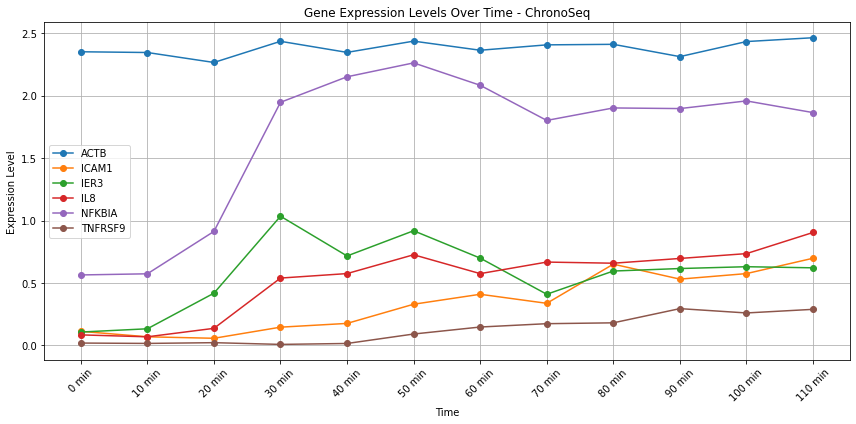

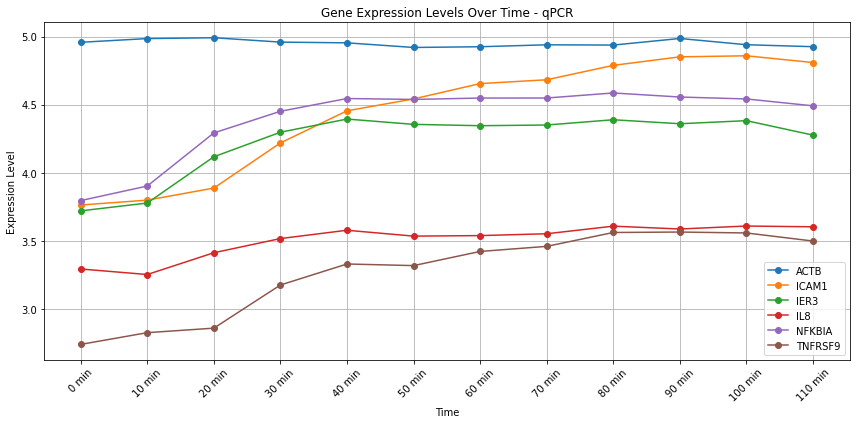

Correlations: {'ACTB': -0.7840715450047907, 'ICAM1': 0.8916393721637708, 'IER3': 0.7866535879593112, 'IL8': 0.9319620812429161, 'NFKBIA': 0.9313931672951883, 'TNFRSF9': 0.8029615631894048}
P-values: {'ACTB': 0.0025395644355769784, 'ICAM1': 9.783984302841912e-05, 'IER3': 0.002402535142707902, 'IL8': 1.0235528070823942e-05, 'NFKBIA': 1.0660295545512964e-05, 'TNFRSF9': 0.0016626101332005985}


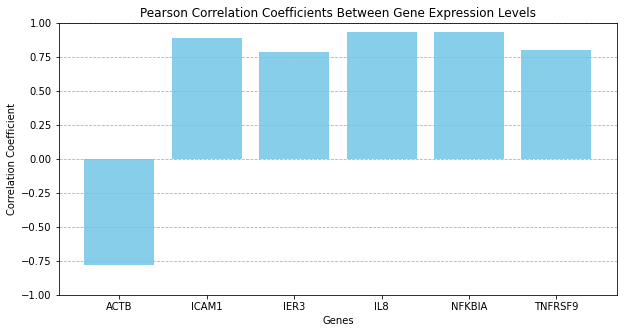

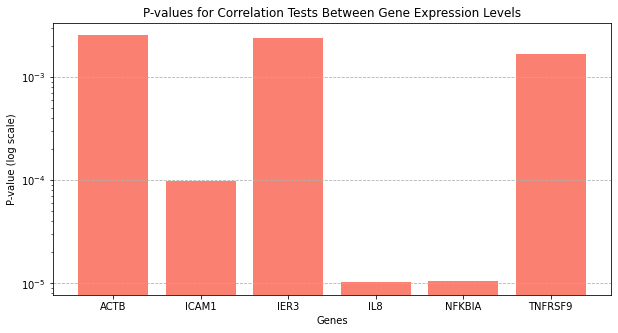

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Data from the first table (expression levels over time for sample 1)
data1 = {
    'Time': ['0 min', '10 min', '20 min', '30 min', '40 min', '50 min', '60 min', '70 min', '80 min', '90 min', '100 min', '110 min'],
    'ACTB': [2.351498, 2.345519, 2.265785, 2.435185, 2.346521, 2.436598, 2.363648, 2.406789, 2.411109, 2.312562, 2.433216, 2.463869],
    'ICAM1': [0.112436, 0.068673, 0.056823, 0.145843, 0.175942, 0.329538, 0.40929, 0.33687, 0.650445, 0.53064, 0.574839, 0.697737],
    'IER3': [0.106823, 0.132932, 0.41799, 1.034437, 0.716124, 0.917963, 0.698879, 0.409435, 0.595401, 0.615399, 0.630024, 0.621174],
    'IL8': [0.084052, 0.068673, 0.136427, 0.539073, 0.575022, 0.725738, 0.574647, 0.667157, 0.658067, 0.69612, 0.734869, 0.904187],
    'NFKBIA': [0.564091, 0.573266, 0.91266, 1.946741, 2.151148, 2.26241, 2.083109, 1.801656, 1.901556, 1.896478, 1.957879, 1.864372],
    'TNFRSF9': [0.018615, 0.015673, 0.021689, 0.00782, 0.015272, 0.090938, 0.14701, 0.173733, 0.180604, 0.294334, 0.259672, 0.288611]
}

# Data from the second table (expression levels over time for sample 2)
data2 = {
    'Time': ['0 min', '10 min', '20 min', '30 min', '40 min', '50 min', '60 min', '70 min', '80 min', '90 min', '100 min', '110 min'],
    'ACTB': [4.958394, 4.985733, 4.991905, 4.959719, 4.954371, 4.920373, 4.925725, 4.93999, 4.937952, 4.986373, 4.940557, 4.926088],
    'ICAM1': [3.762957, 3.798595, 3.887424, 4.219029, 4.454937, 4.542329, 4.65486, 4.683146, 4.788948, 4.851498, 4.85929, 4.809641],
    'IER3': [3.719859, 3.777345, 4.117186, 4.297679, 4.394394, 4.355457, 4.345558, 4.350676, 4.38928, 4.360006, 4.38256, 4.276505],
    'IL8': [3.29283, 3.252145, 3.412137, 3.516329, 3.577381, 3.534298, 3.538119, 3.551715, 3.607446, 3.586638, 3.60845, 3.60268],
    'NFKBIA': [3.795397, 3.902246, 4.292291, 4.451543, 4.54525, 4.538566, 4.548736, 4.549018, 4.58606, 4.556263, 4.542086, 4.491632],
    'TNFRSF9': [2.738693, 2.824883, 2.85813, 3.175098, 3.329529, 3.317606, 3.421663, 3.459033, 3.561005, 3.56427, 3.557455, 3.498055]
}

# Convert to DataFrames
df1 = pd.DataFrame(data1).set_index('Time')
df2 = pd.DataFrame(data2).set_index('Time')

# Plotting gene expression over time for the first dataset
plt.figure(figsize=(12, 6))
for gene in df1.columns:
    plt.plot(df1.index, df1[gene], marker='o', label=gene)
plt.title('Gene Expression Levels Over Time - ChronoSeq')
plt.xlabel('Time')
plt.ylabel('Expression Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting gene expression over time for the second dataset
plt.figure(figsize=(12, 6))
for gene in df2.columns:
    plt.plot(df2.index, df2[gene], marker='o', label=gene)
plt.title('Gene Expression Levels Over Time - qPCR')
plt.xlabel('Time')
plt.ylabel('Expression Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Pearson correlation and p-values for each gene
correlations = {}
p_values = {}
genes = df1.columns
for gene in genes:
    # Ensure we are correlating the numerical values
    corr, p_val = pearsonr(df1[gene].astype(float), df2[gene].astype(float))
    correlations[gene] = corr
    p_values[gene] = p_val

# Output correlation and p-values dictionaries
print("Correlations:", correlations)
print("P-values:", p_values)

# Plotting correlation coefficients
plt.figure(figsize=(10, 5))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.title('Pearson Correlation Coefficients Between Gene Expression Levels')
plt.xlabel('Genes')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1) # Correlation coefficient ranges from -1 to 1
plt.grid(axis='y', linestyle='--')
plt.show()

# Plotting p-values on a logarithmic scale
plt.figure(figsize=(10, 5))
plt.bar(p_values.keys(), p_values.values(), color='salmon')
plt.title('P-values for Correlation Tests Between Gene Expression Levels')
plt.xlabel('Genes')
plt.ylabel('P-value (log scale)')
plt.yscale('log') # Use logarithmic scale for p-values as they can be very small
plt.grid(axis='y', linestyle='--')
plt.show()


In [22]:
correlations

{'ACTB': -0.7840715450047907,
 'ICAM1': 0.8916393721637708,
 'IER3': 0.7866535879593112,
 'IL8': 0.9319620812429161,
 'NFKBIA': 0.9313931672951883,
 'TNFRSF9': 0.8029615631894048}

In [23]:
p_values

{'ACTB': 0.0025395644355769784,
 'ICAM1': 9.783984302841912e-05,
 'IER3': 0.002402535142707902,
 'IL8': 1.0235528070823942e-05,
 'NFKBIA': 1.0660295545512964e-05,
 'TNFRSF9': 0.0016626101332005985}

In [25]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from scipy.signal import correlate
from scipy.stats import pearsonr

# Data from the first table (expression levels over time for sample 1)
data1 = {
    'Time': ['0 min', '10 min', '20 min', '30 min', '40 min', '50 min', '60 min', '70 min', '80 min', '90 min', '100 min', '110 min'],
    'ACTB': [2.351498, 2.345519, 2.265785, 2.435185, 2.346521, 2.436598, 2.363648, 2.406789, 2.411109, 2.312562, 2.433216, 2.463869],
    'ICAM1': [0.112436, 0.068673, 0.056823, 0.145843, 0.175942, 0.329538, 0.40929, 0.33687, 0.650445, 0.53064, 0.574839, 0.697737],
    'IER3': [0.106823, 0.132932, 0.41799, 1.034437, 0.716124, 0.917963, 0.698879, 0.409435, 0.595401, 0.615399, 0.630024, 0.621174],
    'IL8': [0.084052, 0.068673, 0.136427, 0.539073, 0.575022, 0.725738, 0.574647, 0.667157, 0.658067, 0.69612, 0.734869, 0.904187],
    'NFKBIA': [0.564091, 0.573266, 0.91266, 1.946741, 2.151148, 2.26241, 2.083109, 1.801656, 1.901556, 1.896478, 1.957879, 1.864372],
    'TNFRSF9': [0.018615, 0.015673, 0.021689, 0.00782, 0.015272, 0.090938, 0.14701, 0.173733, 0.180604, 0.294334, 0.259672, 0.288611]
}

# Data from the second table (expression levels over time for sample 2)
data2 = {
    'Time': ['0 min', '10 min', '20 min', '30 min', '40 min', '50 min', '60 min', '70 min', '80 min', '90 min', '100 min', '110 min'],
    'ACTB': [4.958394, 4.985733, 4.991905, 4.959719, 4.954371, 4.920373, 4.925725, 4.93999, 4.937952, 4.986373, 4.940557, 4.926088],
    'ICAM1': [3.762957, 3.798595, 3.887424, 4.219029, 4.454937, 4.542329, 4.65486, 4.683146, 4.788948, 4.851498, 4.85929, 4.809641],
    'IER3': [3.719859, 3.777345, 4.117186, 4.297679, 4.394394, 4.355457, 4.345558, 4.350676, 4.38928, 4.360006, 4.38256, 4.276505],
    'IL8': [3.29283, 3.252145, 3.412137, 3.516329, 3.577381, 3.534298, 3.538119, 3.551715, 3.607446, 3.586638, 3.60845, 3.60268],
    'NFKBIA': [3.795397, 3.902246, 4.292291, 4.451543, 4.54525, 4.538566, 4.548736, 4.549018, 4.58606, 4.556263, 4.542086, 4.491632],
    'TNFRSF9': [2.738693, 2.824883, 2.85813, 3.175098, 3.329529, 3.317606, 3.421663, 3.459033, 3.561005, 3.56427, 3.557455, 3.498055]
}

df1 = pd.DataFrame(data1).set_index('Time')
df2 = pd.DataFrame(data2).set_index('Time')

# DTW approximation using Euclidean distance and lagged cross-correlation
# Since dtw package is not available, we will use cross-correlation to approximate similarity and lag

dtw_approx_results = {}
ccf_results = {}

for gene in df1.columns:
    x = df1[gene].values
    y = df2[gene].values

    # Normalize the series
    x_norm = (x - np.mean(x)) / np.std(x)
    y_norm = (y - np.mean(y)) / np.std(y)

    # Cross-correlation
    ccf = correlate(x_norm, y_norm, mode='full')
    lags = np.arange(-len(x_norm) + 1, len(x_norm))
    max_ccf_index = np.argmax(ccf)
    max_ccf = ccf[max_ccf_index]
    lag_at_max_ccf = lags[max_ccf_index]

    # Pearson correlation as a proxy for similarity
    r, p = pearsonr(x, y)

    dtw_approx_results[gene] = {'max_ccf': max_ccf, 'lag': lag_at_max_ccf, 'pearson_r': r, 'pearson_p': p}
    ccf_results[gene] = {'ccf': ccf, 'lags': lags}

dtw_approx_results


{'ACTB': {'max_ccf': 3.9627248176162824,
  'lag': -4,
  'pearson_r': -0.7840715450047907,
  'pearson_p': 0.0025395644355769784},
 'ICAM1': {'max_ccf': 10.699672465965246,
  'lag': 0,
  'pearson_r': 0.8916393721637708,
  'pearson_p': 9.783984302841912e-05},
 'IER3': {'max_ccf': 9.439843055511739,
  'lag': 0,
  'pearson_r': 0.7866535879593112,
  'pearson_p': 0.002402535142707902},
 'IL8': {'max_ccf': 11.183544974914991,
  'lag': 0,
  'pearson_r': 0.9319620812429161,
  'pearson_p': 1.0235528070823942e-05},
 'NFKBIA': {'max_ccf': 11.176718007542263,
  'lag': 0,
  'pearson_r': 0.9313931672951883,
  'pearson_p': 1.0660295545512964e-05},
 'TNFRSF9': {'max_ccf': 9.951150843225745,
  'lag': 1,
  'pearson_r': 0.8029615631894048,
  'pearson_p': 0.0016626101332005985}}

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

# Data from the first table (expression levels over time for sample 1)
data1 = {
    'Time': ['0 min', '10 min', '20 min', '30 min', '40 min', '50 min', '60 min', '70 min', '80 min', '90 min', '100 min', '110 min'],
    'ACTB': [2.351498, 2.345519, 2.265785, 2.435185, 2.346521, 2.436598, 2.363648, 2.406789, 2.411109, 2.312562, 2.433216, 2.463869],
    'ICAM1': [0.112436, 0.068673, 0.056823, 0.145843, 0.175942, 0.329538, 0.40929, 0.33687, 0.650445, 0.53064, 0.574839, 0.697737],
    'IER3': [0.106823, 0.132932, 0.41799, 1.034437, 0.716124, 0.917963, 0.698879, 0.409435, 0.595401, 0.615399, 0.630024, 0.621174],
    'IL8': [0.084052, 0.068673, 0.136427, 0.539073, 0.575022, 0.725738, 0.574647, 0.667157, 0.658067, 0.69612, 0.734869, 0.904187],
    'NFKBIA': [0.564091, 0.573266, 0.91266, 1.946741, 2.151148, 2.26241, 2.083109, 1.801656, 1.901556, 1.896478, 1.957879, 1.864372],
    'TNFRSF9': [0.018615, 0.015673, 0.021689, 0.00782, 0.015272, 0.090938, 0.14701, 0.173733, 0.180604, 0.294334, 0.259672, 0.288611]
}

# Data from the second table (expression levels over time for sample 2)
data2 = {
    'Time': ['0 min', '10 min', '20 min', '30 min', '40 min', '50 min', '60 min', '70 min', '80 min', '90 min', '100 min', '110 min'],
    'ACTB': [4.958394, 4.985733, 4.991905, 4.959719, 4.954371, 4.920373, 4.925725, 4.93999, 4.937952, 4.986373, 4.940557, 4.926088],
    'ICAM1': [3.762957, 3.798595, 3.887424, 4.219029, 4.454937, 4.542329, 4.65486, 4.683146, 4.788948, 4.851498, 4.85929, 4.809641],
    'IER3': [3.719859, 3.777345, 4.117186, 4.297679, 4.394394, 4.355457, 4.345558, 4.350676, 4.38928, 4.360006, 4.38256, 4.276505],
    'IL8': [3.29283, 3.252145, 3.412137, 3.516329, 3.577381, 3.534298, 3.538119, 3.551715, 3.607446, 3.586638, 3.60845, 3.60268],
    'NFKBIA': [3.795397, 3.902246, 4.292291, 4.451543, 4.54525, 4.538566, 4.548736, 4.549018, 4.58606, 4.556263, 4.542086, 4.491632],
    'TNFRSF9': [2.738693, 2.824883, 2.85813, 3.175098, 3.329529, 3.317606, 3.421663, 3.459033, 3.561005, 3.56427, 3.557455, 3.498055]
}

# Convert to DataFrames
df1 = pd.DataFrame(data1).set_index('Time')
df2 = pd.DataFrame(data2).set_index('Time')

# Calculate cosine distance for each gene
cosine_distances = {}
genes = df1.columns

print("Cosine Distances:")
for gene in genes:
    # Extract expression values for the current gene from both datasets
    vector1 = df1[gene].values
    vector2 = df2[gene].values

    # Calculate cosine distance
    # cosine() function returns 1 - cosine_similarity
    # If vectors are identical, distance is 0.
    # If vectors are orthogonal, distance is 1.
    # If vectors are opposite, distance is 2 (for data that can be negative).
    # For positive data like gene expression, distance will be between 0 and 1.
    dist = cosine(vector1, vector2)
    cosine_distances[gene] = dist
    print(f"{gene}: {dist:.6f}")

# You can also store them in a DataFrame for better presentation if needed
# cosine_distances_df = pd.DataFrame(list(cosine_distances.items()), columns=['Gene', 'Cosine_Distance'])
# print("\nCosine Distances DataFrame:")
# print(cosine_distances_df)


Cosine Distances:
ACTB: 0.000387
ICAM1: 0.121555
IER3: 0.075098
IL8: 0.093160
NFKBIA: 0.039974
TNFRSF9: 0.197282
